In [18]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_d = pd.read_csv(city_data)
ride_d = pd.read_csv(ride_data)

# Combine the data into a single dataset
merger = pd.merge(ride_d, city_d, on="city", how="left")
driver = merger.drop_duplicates('city')

# Display the data table for preview
merger.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban


## Bubble Plot of Ride Sharing Data

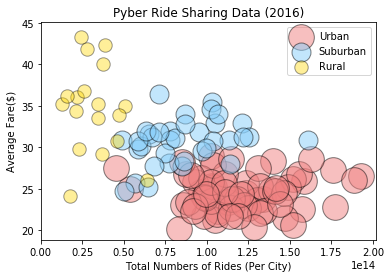

In [19]:
# Obtain the x and y coordinates for each of the three city types
urban = merger.loc[merger["type"] == "Urban"]
suburban = merger.loc[merger["type"] == "Suburban"]
rural = merger.loc[merger["type"] == "Rural"]

urban_m = driver.loc[driver["type"] == "Urban"]
suburban_m = driver.loc[driver["type"] == "Suburban"]
rural_m = driver.loc[driver["type"] == "Rural"]


urban_city = urban.groupby(["city"])
UF = urban_city["fare"].mean()
UR = urban_city["ride_id"].sum()
UD = urban_m["driver_count"].count()

sub_city = suburban.groupby(["city"])
SF = sub_city["fare"].mean()
SR = sub_city["ride_id"].sum()
SD = suburban_m["driver_count"].count()

r_city = rural.groupby(["city"])
RF = r_city["fare"].mean()
RR = r_city["ride_id"].sum()
RD = rural_m["driver_count"].count()

# Build the scatter plots for each city types

plt.scatter(UR, UF, s=UD*10, marker = 'o', facecolors = 'lightcoral', edgecolors = 'black', alpha = 0.5, label = "Urban")
plt.scatter(SR, SF, s=SD*10, marker = 'o', facecolors = 'lightskyblue', edgecolors = 'black', alpha = 0.5, label = "Suburban")
plt.scatter(RR, RF, s=RD*10, marker = 'o', facecolors = 'gold', edgecolors = 'black', alpha = 0.4, label = "Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend(loc="upper right")

# Incorporate a text label regarding circle size

plt.savefig("../images/Pyber Ride Sharing Data 2016.png")




## Total Fares by City Type

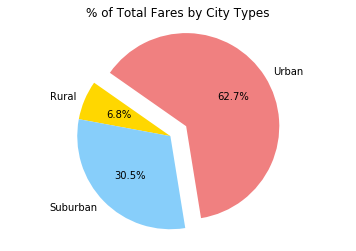

In [20]:
# Calculate Type Percents
city_group = merger.groupby(['type'])

fares = city_group["fare"].sum()

# Build Pie Chart

labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.2)

plt.pie(fares, colors=colors, explode=explode, labels=labels, autopct="%1.1f%%", startangle = 145, shadow = False)
plt.title("% of Total Fares by City Types")
plt.axis("equal")

# Save Figure

plt.savefig("../images/% of Total Fares by City Types.png")

# Show Figure

plt.show()

## Total Rides by City Type

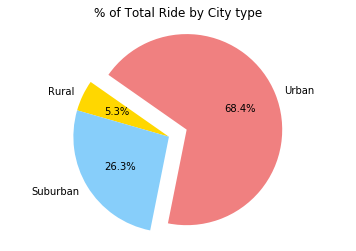

In [21]:
# Calculate Ride Percents

ride = city_group["ride_id"].count()

plt.pie(ride, colors=colors, explode=explode, labels=labels, autopct="%1.1f%%", startangle = 145, shadow = False)
plt.title("% of Total Ride by City type")
plt.axis("equal")

plt.savefig("../images/% of Total Ride by City Type")

plt.show()


## Total Drivers by City Type

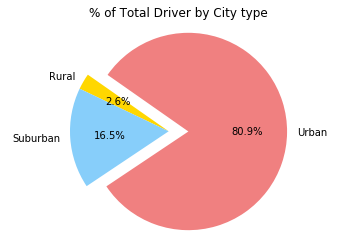

In [22]:
# Calculate Driver Percents
driver = driver.groupby(["type"])
drivers = driver["driver_count"].sum()


plt.pie(drivers, colors=colors, explode=explode, labels=labels, autopct="%1.1f%%", startangle = 145, shadow = False)
plt.title("% of Total Driver by City type")
plt.axis("equal")

plt.savefig("../images/% of Total Drivers by City Type")

plt.show()
